#### Import Library

In [1]:
import sys
sys.path.append("../modules")
from eda import EDAAnalyzer
from spark_session import SparkManager
from feature_engineering import FeatureEngineer

In [2]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

#### Constants and config

In [3]:
mx_submits_path = "../data_sample/mx_submits.parquet/"
mx_submits_line_path = "../data_sample/mx_submitsline.parquet/"


sample_patient_id = "8aad41f612a7095449888c8050abaeb05fdee65643caa3033542610421d8bd1daaa2c4ce1757401003a1bbcd60948a7aa13eba507a676dea80e0cf76b77dbc95"
features_cols = ['secondary_payer_state',
'billing_provider_address_precision',
'billing_provider_address_region',
'claim_filing_indicator_pay_type',
'claim_institutional_or_professional',
'facility_provider_address_precision',
'facility_provider_address_region',
'inpatient_discharge_status_code',
'organization_npi_type_code',
'organization_sourced_from',
'organization_taxonomy_group',
'patient_gender',
'patient_id',
'patient_location_residential_region',
'primary_payer_pay_type',
'primary_payer_plan_type',
'principal_diagnosis_body_part',
'principal_diagnosis_category',
'principal_diagnosis_code_set',
'principal_procedure_code_set',
'referring_provider_taxonomy_group',
'rendering_provider_npi_type_code',
'rendering_provider_taxonomy_group',
'secondary_payer_claim_filing_indicator_code',
'secondary_payer_pay_type',
'secondary_payer_plan_type',
'claim_all_diagnosis_codes',
'claim_total_charge_amount',
'previous_line_level_procedure_ohe',
'line_level_procedures_ohe']
exclude_cols = ['patient_id']
most_repeated_diagnosis_list = [] 

### Spark Session

In [4]:
mx_submits_spark_manager = SparkManager(mx_submits_path)
mx_submits_line_spark_manager = SparkManager(mx_submits_line_path)

24/10/07 21:51:48 WARN Utils: Your hostname, Chaopings-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.0.0.231 instead (on interface en0)
24/10/07 21:51:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/07 21:51:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Mx submits

#### EDA

In [5]:
mx_submits_eda = EDAAnalyzer(mx_submits_spark_manager)

In [6]:
mx_submits_eda.display_head()

24/10/03 22:50:12 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,type_of_bill_frequency_description,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type
0,3ee474ced18dee188f60998c02cffbd6,6e116682aeba6cd8a5341a9bc3b6f020,f153bfef2996ceb781d1af74584de4ef,None,None,None,None,None,None,None,...,None,cyan,full_20240611,1995,F,1e02c8a3f487eb280a67dc1fefec72a6863c596025c71d...,37.510395,-77.595345,23113,1
1,5f073362896aaab38644e27366cb5061,6e116682aeba6cd8a5341a9bc3b6f020,daeeeaf38b716fe6c9027e334c45983f,None,"SAN DIEGO-CHULA VISTA-CARLSBAD, CA",San Diego,San Diego,5050MURPHYCANYONRDSANDIEGOCA92123,32.830444,-117.120552,...,Interim (Continuing Claims),cyan,full_20240611,1938,M,df58abbb7b7f25af4d18f67ac6414ad44a85a9cd0b6e8f...,37.370625,-122.08271,94040,2
2,831ea3757fc612d3723120f5cb2be959,6e116682aeba6cd8a5341a9bc3b6f020,9cfab39809cf60ac1f60e44f176bd607,None,"PALATKA, FL",Palatka,Putnam,611ZEAGLERDRPALATKAFL32177,29.642433,-81.692558,...,Admit Through Discharge Claim,cyan,full_20240611,2009,U,63f93c828985b5a2995756855f9fe95e414aae61ed727d...,29.639235,-81.678658,32131,1
3,cd0945804e18df22c15ba88f3814472e,f74909ace68e51891440e4da0b65a70c,c513778878911cb3de032d6a1011ef8f,None,None,None,None,None,None,None,...,Admit Through Discharge Claim,cyan,full_20240611,1965,F,6ddfe4c9026ec8fd190d2a47cf9989b3f4eb21a32250c7...,39.931477,-76.718020,17403,1
4,c6a997f72e37bf0f0775d5ad98afd105,f74909ace68e51891440e4da0b65a70c,b32d8369102d2dbce2ef451cf094f786,None,None,None,None,None,None,None,...,None,cyan,full_20240611,1977,F,25b6fec22b1a0d6c6d312cb9401df00f82d4270e316cf0...,35.978776,-83.897899,37914,2


In [7]:
mx_submits_eda.display_shape()

'Shape of data: rows: 5989258, cols: 127'

#### Type conversion

In [8]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])

Casted claim_total_charge_amount to float


column_info_submits = mx_submits_eda.display_column_info()
column_info_submits.to_csv("../output/column_info_submits.csv")
column_info_submits

column_info_submits[column_info_submits["Column Name"]=="claim_total_charge_amount"]

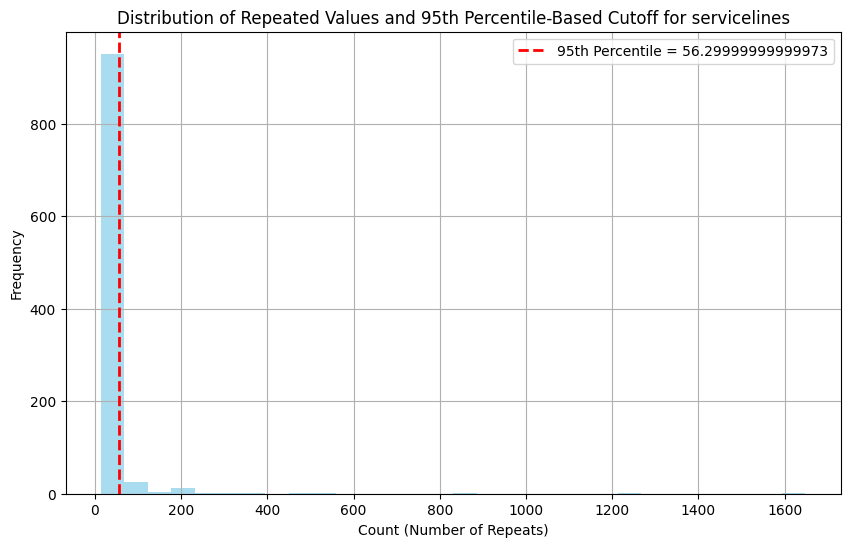

In [9]:
mx_submits_eda.plot_percentile_based_procedure_cutoff("servicelines",95)

In [30]:
mx_submits_line_level_procedure_codes_repeat_count = mx_submits_eda.get_top_n_repeated_procedures("servicelines")

24/10/03 23:45:59 ERROR Utils: Uncaught exception in thread task-result-getter-0
java.lang.OutOfMemoryError: Java heap space
24/10/03 23:45:59 ERROR Utils: uncaught error in thread Spark Context Cleaner, stopping SparkContext
java.lang.OutOfMemoryError: Java heap space
Exception in thread "task-result-getter-0" java.lang.OutOfMemoryError: Java heap space
24/10/03 23:46:04 ERROR Utils: throw uncaught fatal error in thread Spark Context Cleaner
java.lang.OutOfMemoryError: Java heap space
Exception in thread "Spark Context Cleaner" java.lang.OutOfMemoryError: Java heap space


Py4JJavaError: An error occurred while calling o2916.collectToPython.
: org.apache.spark.SparkException: Job 124 cancelled because SparkContext was shut down
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$cleanUpAfterSchedulerStop$1(DAGScheduler.scala:1253)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$cleanUpAfterSchedulerStop$1$adapted(DAGScheduler.scala:1251)
	at scala.collection.mutable.HashSet.foreach(HashSet.scala:79)
	at org.apache.spark.scheduler.DAGScheduler.cleanUpAfterSchedulerStop(DAGScheduler.scala:1251)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onStop(DAGScheduler.scala:3087)
	at org.apache.spark.util.EventLoop.stop(EventLoop.scala:84)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$stop$3(DAGScheduler.scala:2973)
	at org.apache.spark.util.Utils$.tryLogNonFatalError(Utils.scala:1375)
	at org.apache.spark.scheduler.DAGScheduler.stop(DAGScheduler.scala:2973)
	at org.apache.spark.SparkContext.$anonfun$stop$12(SparkContext.scala:2258)
	at org.apache.spark.util.Utils$.tryLogNonFatalError(Utils.scala:1375)
	at org.apache.spark.SparkContext.stop(SparkContext.scala:2258)
	at org.apache.spark.SparkContext.stop(SparkContext.scala:2211)
	at org.apache.spark.SparkContext$$anon$3.run(SparkContext.scala:2198)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$executeCollect$1(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:418)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4150)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4324)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4322)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4322)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4147)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


In [12]:
most_repeated_procedures = mx_submits_line_level_procedure_codes_repeat_count[
    (mx_submits_line_level_procedure_codes_repeat_count["count"] > 57)
]
most_repeated_procedure_list = most_repeated_procedures['line_level_procedure_code'].tolist()
most_repeated_procedures

NameError: name 'mx_submits_line_level_procedure_codes_repeat_count' is not defined

### MX SUBMITS LINE

#### EDA

In [5]:
mx_submits_line_eda = EDAAnalyzer(mx_submits_line_spark_manager)

In [6]:
mx_submits_line_eda.display_head()

24/10/07 21:52:43 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,...,line_level_procedure_modifier_1,line_level_procedure_modifier_2,line_level_procedure_modifier_3,line_level_procedure_modifier_4,line_level_procedure_category,line_level_revenue_code,line_level_revenue_description,line_level_from_date,line_level_to_date,line_level_units_billed
0,None,"FLINT, MI",Flint,Genesee,2222SLINDENRDFLINTMI48532,42.996639,-83.773331,Rooftop,Midwest,MI,...,None,None,None,None,None,0270,None,2023-04-24,2023-04-24,1.00
1,None,None,None,None,None,None,None,None,None,None,...,95,None,None,None,EVALUATION AND MANAGEMENT - NON-FACE-TO-FACE P...,None,None,2022-12-20,2022-12-20,1.00
2,None,"NEW YORK-NEWARK-JERSEY CITY, NY-NJ-PA",Richmond Hill,Queens,1302089THRDRICHMONDHILLNY11418,40.699558,-73.820145,Rooftop,Northeast,NY,...,None,None,None,None,None,0529,Free-Standing Clinic,2016-09-20,2016-09-20,1.00
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,2019-07-09,2019-07-09,1.00
4,None,"NEW YORK-NEWARK-JERSEY CITY, NY-NJ-PA",Clark,Union,1180RARITANRDCLARKNJ07066,40.63044,-74.311783,Rooftop,Northeast,NJ,...,GP,59,None,None,MEDICINE - PHYSICAL MEDICINE AND REHABILITATION,None,None,2022-10-24,2022-10-24,1.00


In [7]:
mx_submits_line_eda.display_shape()

'Shape of data: rows: 329307, cols: 150'

#### Feature Engineering

In [8]:
mx_submits_fe=FeatureEngineer(mx_submits_spark_manager)

In [10]:
mx_submits_fe.transform_line_level_procedure_codes()

,line_level_procedures_ohe
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [11]:
mx_submits_fe.add_procedures_with_exponential_decay_sparse_vector()

DataFrame After Adding Previous Procedures OHE with Exponential Decay - Shape: 124217 rows, 132 columns


In [12]:
mx_submits_fe.add_continuous_visit_years()
mx_submits_fe.display_top_rows_as_pandas("continuous_visit_years")

,continuous_visit_years
0,1
1,1
2,1
3,1
4,1


In [13]:
mx_submits_fe.retain_columns(features_cols)

In [14]:
mx_submits_fe.convert_columns_to_float(["claim_total_charge_amount"])
preprocess_data = mx_submits_fe.preprocess_data(exclude_cols=exclude_cols)
preprocess_data

Casted claim_total_charge_amount to float


One-Hot Encoding applied successfully to column: secondary_payer_state
One-Hot Encoding applied successfully to column: billing_provider_address_precision
One-Hot Encoding applied successfully to column: billing_provider_address_region
One-Hot Encoding applied successfully to column: claim_filing_indicator_pay_type
One-Hot Encoding applied successfully to column: claim_institutional_or_professional
One-Hot Encoding applied successfully to column: facility_provider_address_precision
One-Hot Encoding applied successfully to column: facility_provider_address_region
One-Hot Encoding applied successfully to column: inpatient_discharge_status_code
One-Hot Encoding applied successfully to column: organization_npi_type_code
One-Hot Encoding applied successfully to column: organization_sourced_from
One-Hot Encoding applied successfully to column: organization_taxonomy_group
One-Hot Encoding applied successfully to column: patient_gender
One-Hot Encoding applied successfully to column: patient_l

IllegalArgumentException: previous_diagnosis_ohe does not exist. Available: secondary_payer_state, billing_provider_address_precision, billing_provider_address_region, claim_filing_indicator_pay_type, claim_institutional_or_professional, facility_provider_address_precision, facility_provider_address_region, inpatient_discharge_status_code, organization_npi_type_code, organization_sourced_from, organization_taxonomy_group, patient_gender, patient_id, patient_location_residential_region, primary_payer_pay_type, primary_payer_plan_type, principal_diagnosis_body_part, principal_diagnosis_category, principal_diagnosis_code_set, principal_procedure_code_set, referring_provider_taxonomy_group, rendering_provider_npi_type_code, rendering_provider_taxonomy_group, secondary_payer_claim_filing_indicator_code, secondary_payer_pay_type, secondary_payer_plan_type, claim_all_diagnosis_codes, claim_total_charge_amount, previous_line_level_procedure_ohe, line_level_procedures_ohe, secondary_payer_state_index, billing_provider_address_precision_index, billing_provider_address_region_index, claim_filing_indicator_pay_type_index, claim_institutional_or_professional_index, facility_provider_address_precision_index, facility_provider_address_region_index, inpatient_discharge_status_code_index, organization_npi_type_code_index, organization_sourced_from_index, organization_taxonomy_group_index, patient_gender_index, patient_location_residential_region_index, primary_payer_pay_type_index, primary_payer_plan_type_index, principal_diagnosis_body_part_index, principal_diagnosis_category_index, principal_diagnosis_code_set_index, principal_procedure_code_set_index, referring_provider_taxonomy_group_index, rendering_provider_npi_type_code_index, rendering_provider_taxonomy_group_index, secondary_payer_claim_filing_indicator_code_index, secondary_payer_pay_type_index, secondary_payer_plan_type_index, secondary_payer_state_ohe, billing_provider_address_precision_ohe, billing_provider_address_region_ohe, claim_filing_indicator_pay_type_ohe, claim_institutional_or_professional_ohe, facility_provider_address_precision_ohe, facility_provider_address_region_ohe, inpatient_discharge_status_code_ohe, organization_npi_type_code_ohe, organization_sourced_from_ohe, organization_taxonomy_group_ohe, patient_gender_ohe, patient_location_residential_region_ohe, primary_payer_pay_type_ohe, primary_payer_plan_type_ohe, principal_diagnosis_body_part_ohe, principal_diagnosis_category_ohe, principal_diagnosis_code_set_ohe, principal_procedure_code_set_ohe, referring_provider_taxonomy_group_ohe, rendering_provider_npi_type_code_ohe, rendering_provider_taxonomy_group_ohe, secondary_payer_claim_filing_indicator_code_ohe, secondary_payer_pay_type_ohe, secondary_payer_plan_type_ohe

In [ ]:
columns_df = mx_submits_fe.get_columns_as_pandas_df()
columns_df['Column Names'].to_list()
feature_cols = mx_submits_fe.get_feature_columns()
feature_cols

In [12]:
mx_submits_fe.reduce_dataframe_size()
mx_submits_fe.train_autoencoder()

input_features : 405


24/10/07 13:52:24 WARN DAGScheduler: Broadcasting large task binary with size 1083.4 KiB
24/10/07 13:52:52 WARN PythonUDFRunner: Detected deadlock while completing task 1.0 in stage 193 (TID 873): Attempting to kill Python Worker
24/10/07 13:52:52 WARN PythonUDFRunner: Detected deadlock while completing task 0.0 in stage 193 (TID 872): Attempting to kill Python Worker
24/10/07 13:52:53 WARN BlockManager: Failed to fetch remote block taskresult_876 from [BlockManagerId(driver, 172.20.20.20, 51784, None)] after 1 fetch failures. Most recent failure cause:
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.network.BlockTransferService.fetchBlockSync(BlockTransferService.scala:103)
	at org.apache.spark.storage.BlockManager.fetchRemoteManagedBuffer(BlockManager.scala:1172)
	at org.apache.spark.storag

Py4JJavaError: An error occurred while calling o2820.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 202.0 failed 1 times, most recent failure: Lost task 0.0 in stage 202.0 (TID 876) (172.20.20.20 executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2458)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.execution.adaptive.QueryStageExec.executeCollect(QueryStageExec.scala:94)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$executeCollect$1(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:418)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4150)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4324)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4322)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4322)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4147)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


24/10/07 13:54:49 WARN JavaUtils: Attempt to delete using native Unix OS command failed for path = /private/var/folders/z1/ns_q0y_x58j6czwk718yj0mc0000gn/T/blockmgr-df4906f0-c8b2-4cf4-a86b-316991481cb6. Falling back to Java IO way
java.io.IOException: Failed to delete: /private/var/folders/z1/ns_q0y_x58j6czwk718yj0mc0000gn/T/blockmgr-df4906f0-c8b2-4cf4-a86b-316991481cb6
	at org.apache.spark.network.util.JavaUtils.deleteRecursivelyUsingUnixNative(JavaUtils.java:174)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:109)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:90)
	at org.apache.spark.util.SparkFileUtils.deleteRecursively(SparkFileUtils.scala:121)
	at org.apache.spark.util.SparkFileUtils.deleteRecursively$(SparkFileUtils.scala:120)
	at org.apache.spark.util.Utils$.deleteRecursively(Utils.scala:1126)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1(DiskBlockManager.scala:368)
	at org.apache.spark.storage.DiskBl